# Exploratory Data Analysis project (Data Science)

The dataset used is from kaggle.com: https://www.kaggle.com/mohansacharya/graduate-admissions

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

The project must demonstrate the following skills:

Ability to formulate relevant questions for investigation
Identifying trends
Identifying covariation between variables
Communicating results effectively using visualisations

# Relevant questions for investigation

1) Which are the top 10 GRE Scores, TOEFL Scores, SOP, LOR, CGPA and what was the ‘Chance of Admit’ for those?

2) Find the correlation between all columns.

3) Which column matters the most for a better chance of admit (highest correlation with ‘Chance of Admit’)?

4) Find people that did better in hard skills (skills that require pure knowledge of the subject) and lesser in soft skills (skills that may require communication and inter-personal relations) and the effect of this on both the ‘Chance of Admit’ and ‘University Rating’.
Note: Hard skills are considered to be the ‘GRE Score’, ‘TOEFL Score’ and ‘CGPA’. Soft skills are considered to be ‘SOP’ and ‘LOR’.

5) Find people that did better in soft skills (skills that may require communication and inter-personal relations) and lesser in hard skills (skills that require pure knowledge of the subject) and the effect of this on both the ‘Chance of Admit’ and 'University rating.
Note: Hard skills are considered to be the ‘GRE Score’, ‘TOEFL Score’ and ‘CGPA’. Soft skills are considered to be ‘SOP’ and ‘LOR’

6) Find the average of the columns that is required to have a ‘Chance of Admit’ higher than the average ‘Chance of Admit’
Find the average of columns that is required to have a ‘Chance of Admit’ in the 75% percentile.

7) Do people with higher hard skills than normal go to a university with a better ‘University Rating’?
Note: Hard skills are considered to be the ‘GRE Score’, ‘TOEFL Score’ and ‘CGPA’.

# Code walkthrough

In [1]:
# Importing the required packages here.
import sys
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats


In [4]:
# Read csv file
admissions_data = pd.read_csv("Desktop/admission_statistics.csv",sep='\s*,\s*',header=0, encoding='ascii', engine='python')

In [5]:
admissions_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
# We drop the 'Serial No.' column from our data set as it doesnt help us in our exploratory data analysis
admissions_data = admissions_data.drop("Serial No.", axis=1)


## Descripe data so we can get an insight of what we are handling and maybe detect any outliers

In [11]:
def descriptiveStatistics(admissions_data):
	print("Descriptive data: ")
	print(admissions_data.describe(include='all'))

descriptiveStatistics(admissions_data)


Descriptive data: 
        GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.598925    0.547500         0.724350  
std      0.596317    0.498362         0.142609  
min      6.800000    0.000000         0.340000  
25%      8.170000    0.000000         0.64

## Print a boxplot to detect any outliers

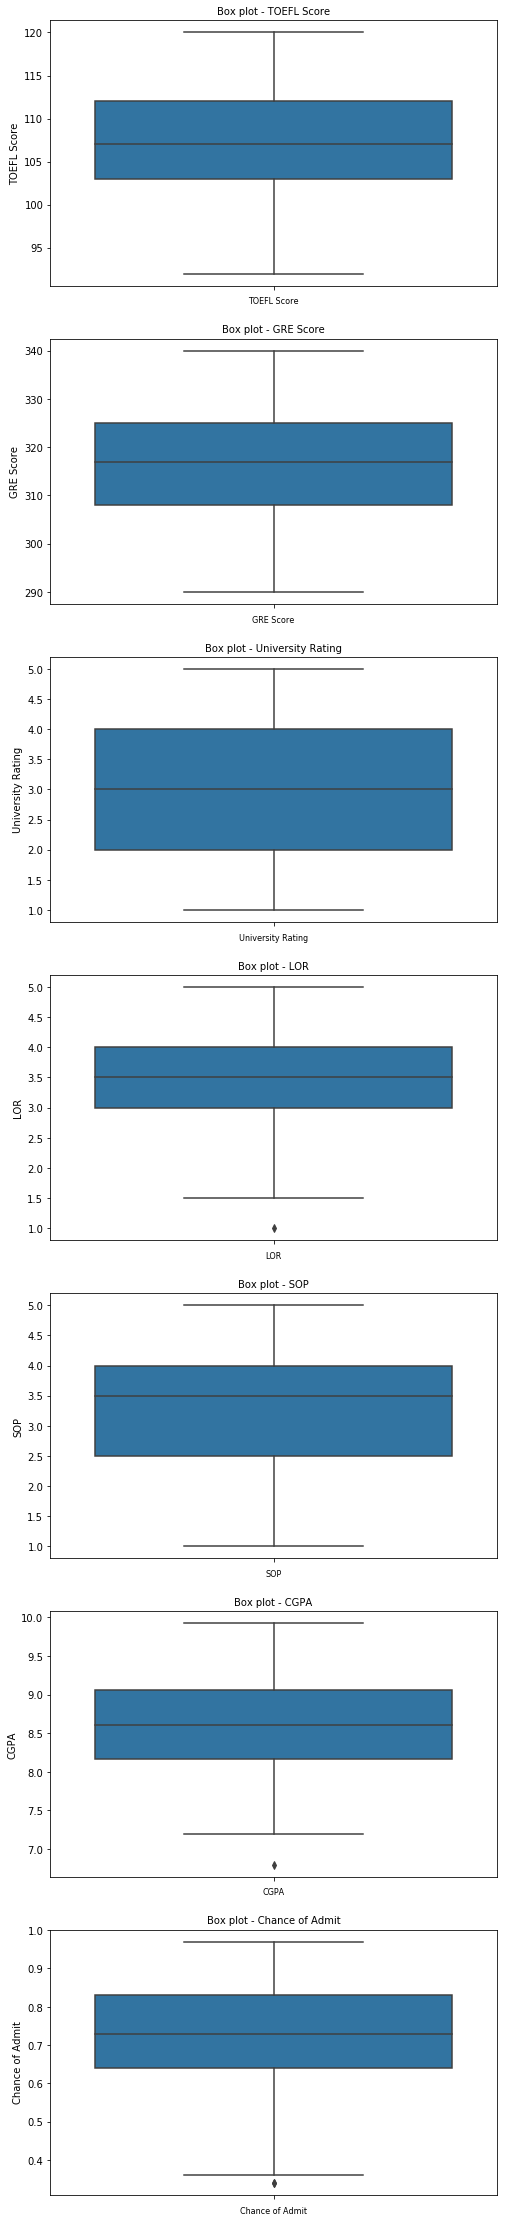

In [13]:
def outlierAnalysis(admissions_data):
	col_names = ['TOEFL Score','GRE Score', 'University Rating','LOR','SOP', 'CGPA', 'Chance of Admit']

	fig, ax = plt.subplots(len(col_names), figsize=(8,40))

	for i, col_val in enumerate(col_names):
		sns.boxplot(y=admissions_data[col_val], ax=ax[i])
		ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
		ax[i].set_xlabel(col_val, fontsize=8)

	plt.show()
    
outlierAnalysis(admissions_data)

## After we saw that there are some outliers (From calling the above function) we remove the outliers and continue our EDA with our new data set.

In [21]:
def outlierAnalysisAndRemoval(admissions_data):
	Q1 = admissions_data.quantile(0.25)
	Q3 = admissions_data.quantile(0.75)	
	IQR = Q3-Q1

	admissions_data_out = admissions_data[~((admissions_data < (Q1 - 1.5 * IQR)) |(admissions_data > (Q3 + 1.5 * IQR))).any(axis=1)]
	return admissions_data_out

# Our data set now after calling the 'OutlierAnalysisAndRemoval' function doesnt contain any outliers.
admissions_data = outlierAnalysisAndRemoval(admissions_data)
admissions_data.shape

(396, 8)

From Out[15] we see that our data set has now been reduced to 396 rows after removing the outliers

## Distribution Graphs 

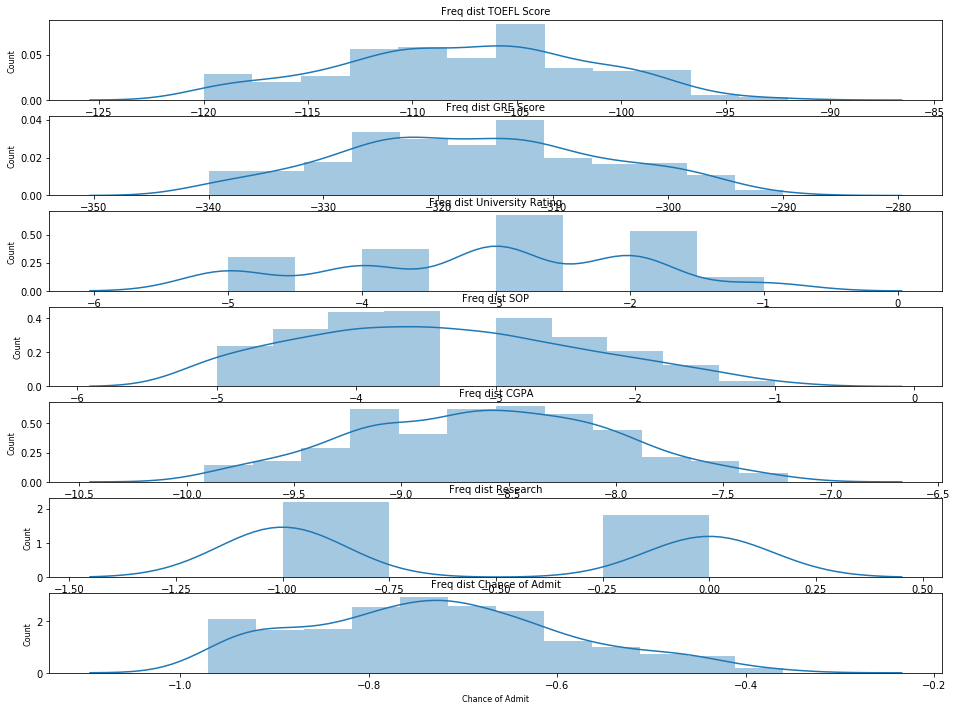

In [16]:
def distributionGraphs(admissions_data):
	col_names = ['TOEFL Score','GRE Score','University Rating','SOP','CGPA', 'Research', 'Chance of Admit']
	fig, ax = plt.subplots(len(col_names), figsize=(16,12))

	for i, col_val in enumerate(col_names):
		sns.distplot(admissions_data[col_val], hist=True, ax=ax[i])
		ax[i].set_title('Freq dist '+col_val, fontsize=10)
		ax[i].set_xlabel(col_val, fontsize=8)
		ax[i].set_ylabel('Count', fontsize=8)

	
	plt.show()
    
distributionGraphs(admissions_data)

## Find top 10 gre,toefl,sop,lor,cgpa scores and what was the chance of admit for those. This is answer to question 1

In [25]:
def topScoresWithChanceOfAdmit(admissions_data,column):
	criteria = admissions_data.sort_values(by = column, ascending=True)
	print(criteria[[column,'Chance of Admit']].head(10))

    
topScoresWithChanceOfAdmit(admissions_data, 'TOEFL Score')


     TOEFL Score  Chance of Admit
212       -120.0            -0.95
143       -120.0            -0.97
297       -120.0            -0.86
81        -120.0            -0.96
97        -120.0            -0.86
25        -120.0            -0.94
202       -120.0            -0.97
203       -120.0            -0.97
23        -119.0            -0.95
176       -119.0            -0.90


You can call the above funtion with any other column.

## Show correlation between data in a heatmap. This is the answer to question 2.

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.831680           0.662604  0.613904   
TOEFL Score         0.831680     1.000000           0.689227  0.657775   
University Rating   0.662604     0.689227           1.000000  0.735329   
SOP                 0.613904     0.657775           0.735329  1.000000   
LOR                 0.547715     0.555149           0.652626  0.726971   
CGPA                0.831085     0.825385           0.740944  0.722563   
Research            0.580865     0.487998           0.448914  0.443889   
Chance of Admit     0.798145     0.785519           0.707278  0.686728   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.547715  0.831085  0.580865         0.798145  
TOEFL Score        0.555149  0.825385  0.487998         0.785519  
University Rating  0.652626  0.740944  0.448914         0.707278  
SOP                0.726971  0.722563  0.443889         0.686728 

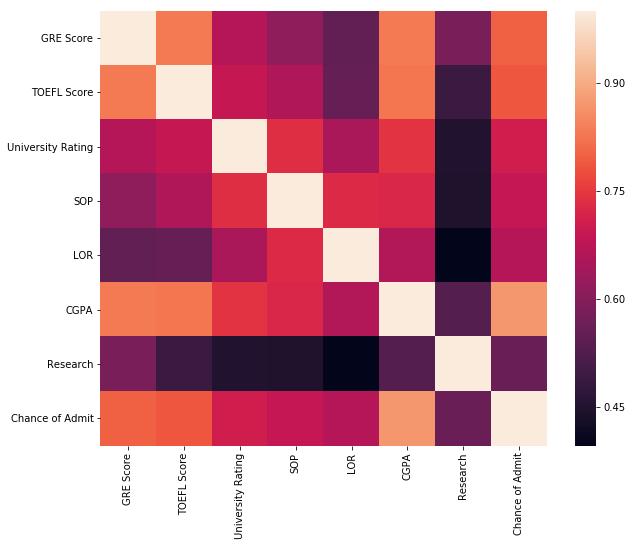

In [26]:
def correlationPlot(admissions_data):
	print(admissions_data.apply(lambda s: admissions_data.corrwith(s)))

	f, ax = plt.subplots(figsize=(10, 8))
	corr = admissions_data.corr()
	sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
	plt.show()

correlationPlot(admissions_data)

## Display collumns that have the highest correlation with 'Chance of Admit'. This is the answer to question 3

There is 7 strongly correlated values with Chance of Admit:
CGPA                 0.870913
GRE Score            0.798145
TOEFL Score          0.785519
University Rating    0.707278
SOP                  0.686728
LOR                  0.662595
Research             0.559622
Name: Chance of Admit, dtype: float64


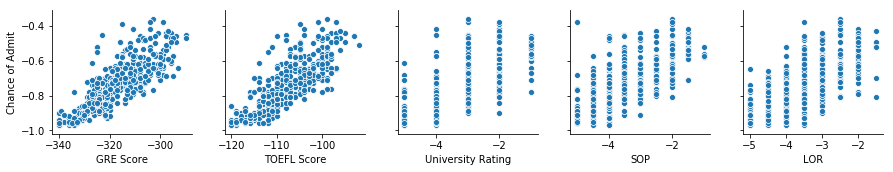

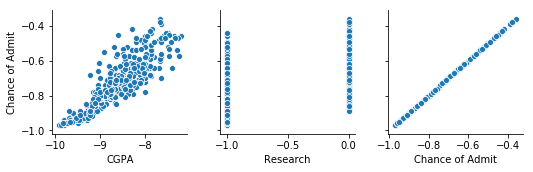

In [28]:
def correlationPlotWithChanceOfAdmit(admissions_data):
	admissions_data_corr = admissions_data.corr()['Chance of Admit'][:-1] # -1 because the latest row is 'Chance of Admit'
	golden_features_list = admissions_data_corr[abs(admissions_data_corr) > 0.5].sort_values(ascending=False)
	print("There is {} strongly correlated values with Chance of Admit:\n{}".format(len(golden_features_list), golden_features_list))

	for i in range(0, len(admissions_data.columns), 5):
		sns.pairplot(data=admissions_data, x_vars=admissions_data.columns[i:i+5], y_vars=['Chance of Admit'])

	plt.show()	
    
correlationPlotWithChanceOfAdmit(admissions_data)
    

## Find people that did better in hard skills (skills that require pure knowledge of the subject) and lesser in soft skills (skills that may require communication and inter-personal relations) and the effect of this on both the 'Chance of Admit' and 'University Rating'.  This is the answer to question 4

Note: Hard skills are considered to be the ‘GRE Score’, ‘TOEFL Score’ and ‘CGPA’. Soft skills are considered to be ‘SOP’ and ‘LOR’.

In [42]:
def betterHardSkillsThanSoftSkills(admissions_data,column):
	criteria = ((admissions_data['GRE Score'] >= admissions_data['GRE Score'].mean()) & (admissions_data['TOEFL Score'] >= admissions_data['TOEFL Score'].mean()) & (admissions_data['CGPA'] >= admissions_data['CGPA'].mean()) & (admissions_data['SOP'] <= admissions_data['SOP'].mean()) & (admissions_data['LOR'] <= admissions_data['LOR'].mean()))
	hard_skills_more = admissions_data[criteria]
	
	print (hard_skills_more[['GRE Score','TOEFL Score','CGPA','SOP', 'LOR', column]])
	

	if column == 'Chance of Admit':
		print("Mean of 'Chance of Admit' on criteria list: ", hard_skills_more[column].mean())
		print("Mean of 'Chance of Admit' on all the admissios_data list is: ", admissions_data[column].mean())
	elif column == 'University Rating':
		print("Mean of 'University Rating' on criteria list: ", hard_skills_more[column].mean())
		print("Mean of 'University Rating' on all the admissios_data list is: ", admissions_data[column].mean())

betterHardSkillsThanSoftSkills(admissions_data, 'Chance of Admit')
betterHardSkillsThanSoftSkills(admissions_data, 'University Rating')



     GRE Score  TOEFL Score  CGPA  SOP  LOR  Chance of Admit
36      -299.0       -106.0 -8.40 -4.0 -4.0            -0.64
86      -315.0       -106.0 -8.42 -4.5 -3.5            -0.72
91      -299.0        -97.0 -7.66 -5.0 -3.5            -0.38
102     -314.0       -106.0 -8.25 -4.0 -3.5            -0.62
112     -301.0       -107.0 -8.34 -3.5 -3.5            -0.62
132     -309.0       -105.0 -8.56 -3.5 -3.5            -0.71
136     -312.0       -103.0 -8.45 -5.0 -4.0            -0.76
166     -302.0       -102.0 -8.33 -3.5 -5.0            -0.65
198     -311.0       -104.0 -8.43 -4.5 -4.5            -0.70
204     -298.0       -105.0 -8.54 -3.5 -4.0            -0.69
207     -310.0       -102.0 -8.02 -3.5 -4.0            -0.66
209     -301.0       -104.0 -8.12 -3.5 -4.0            -0.68
219     -312.0       -104.0 -8.42 -3.5 -3.5            -0.74
256     -309.0        -99.0 -8.56 -4.0 -4.0            -0.76
261     -312.0       -104.0 -8.09 -3.5 -4.0            -0.71
357     -301.0       -10

## Find people that did better in soft skills (skills that may require communication and inter-personal relations) and lesser in hard skills (skills that require pure knowledge of the subject) and the effect of this on both the ‘Chance of Admit’ and 'University rating. This is the answer to question 5

Note: Hard skills are considered to be the ‘GRE Score’, ‘TOEFL Score’ and ‘CGPA’. Soft skills are considered to be ‘SOP’ and ‘LOR’

In [45]:
def betterSoftSkillsThanHardSkills(admissions_data,column):
	criteria = ((admissions_data['GRE Score'] <= admissions_data['GRE Score'].mean()) & (admissions_data['TOEFL Score'] <= admissions_data['TOEFL Score'].mean()) & (admissions_data['CGPA'] <= admissions_data['CGPA'].mean()) & (admissions_data['SOP'] >= admissions_data['SOP'].mean()) & (admissions_data['LOR'] >= admissions_data['LOR'].mean()))
	soft_skills_more = admissions_data[criteria]
	
	print (soft_skills_more[['GRE Score','TOEFL Score','CGPA','SOP', 'LOR', column]])
	
	if column == 'Chance of Admit':
		print("Mean of 'Chance of Admit' on criteria list: ", soft_skills_more[column].mean())
		print("Mean of 'Chance of Admit' on all the admissios_data list is: ", admissions_data[column].mean())
	elif column == 'University Rating':
		print("Mean of 'University Rating' on criteria list: ", soft_skills_more[column].mean())
		print("Mean of 'University Rating' on all the admissios_data list is: ", admissions_data[column].mean())

betterSoftSkillsThanHardSkills(admissions_data,'Chance of Admit')
betterSoftSkillsThanHardSkills(admissions_data,'University Rating')

     GRE Score  TOEFL Score  CGPA  SOP  LOR  Chance of Admit
66      -327.0       -114.0 -9.02 -3.0 -3.0            -0.61
76      -327.0       -112.0 -8.72 -3.0 -3.0            -0.74
127     -319.0       -112.0 -8.71 -2.5 -2.0            -0.78
145     -320.0       -113.0 -8.64 -2.0 -2.5            -0.81
147     -326.0       -114.0 -9.11 -3.0 -3.0            -0.83
229     -324.0       -111.0 -9.01 -3.0 -3.0            -0.82
263     -324.0       -111.0 -8.79 -2.5 -1.5            -0.70
264     -325.0       -110.0 -8.76 -3.0 -2.5            -0.75
283     -321.0       -111.0 -8.90 -2.5 -3.0            -0.80
301     -319.0       -108.0 -8.76 -2.5 -3.0            -0.66
318     -324.0       -111.0 -8.80 -2.5 -2.0            -0.79
336     -319.0       -110.0 -8.79 -3.0 -2.5            -0.72
Mean of 'Chance of Admit' on criteria list:  -0.7508333333333334
Mean of 'Chance of Admit' on all the admissios_data list is:  -0.727979797979798
     GRE Score  TOEFL Score  CGPA  SOP  LOR  University Ratin

## Find the average of the columns that is required to have a ‘Chance of Admit’ higher than the average ‘Chance of Admit’
## Find the average of columns that is required to have a ‘Chance of Admit’ in the 75% percentile. This is the answer to question 6



In [48]:
def admissionHigherThanMeanAnd75Percentile(admissions_data):
	 criteria = admissions_data['Chance of Admit'] > admissions_data['Chance of Admit'].mean()
	 more_than_mean = admissions_data[criteria]
	 more_than_mean= more_than_mean.drop("Chance of Admit", axis=1)
	
	 print("Average of all columns when 'Chance of Admit' is larger than mean")
	 print(more_than_mean.mean())
	 

	 criteria2= admissions_data['Chance of Admit'] > admissions_data['Chance of Admit'].quantile(0.75)
	 more_than_75_percentile = admissions_data[criteria2]
	 more_than_75_percentile = more_than_75_percentile.drop('Chance of Admit', axis=1)

	 print("Average of all columns when 'Chance of Admit' is in the 75% percentile")
	 print(more_than_75_percentile.mean())
    
admissionHigherThanMeanAnd75Percentile(admissions_data)

Average of all columns when 'Chance of Admit' is larger than mean
GRE Score           -308.968750
TOEFL Score         -103.567708
University Rating     -2.380208
SOP                   -2.783854
LOR                   -2.968750
CGPA                  -8.181667
Research              -0.265625
dtype: float64
Average of all columns when 'Chance of Admit' is in the 75% percentile
GRE Score           -305.858696
TOEFL Score         -102.217391
University Rating     -2.173913
SOP                   -2.521739
LOR                   -2.663043
CGPA                  -8.000000
Research              -0.195652
dtype: float64


## Do people with higher hard skills than normal go to a university with a better ‘University Rating’? This is the answer to question 7

Note: Hard skills are considered to be the ‘GRE Score’, ‘TOEFL Score’ and ‘CGPA’.



In [49]:
# See if people with higher than average hard skills go to a university with a better rating. This is the answer to question 7
def hardSkillsBetterUniversity(admissions_data):
	criteria = ((admissions_data['GRE Score'] >= admissions_data['GRE Score'].mean()) & (admissions_data['TOEFL Score'] >= admissions_data['TOEFL Score'].mean()) & (admissions_data['CGPA'] >= admissions_data['CGPA'].mean()))
	hard_skills_better_uni = admissions_data[criteria]
	
	print (hard_skills_better_uni[['GRE Score','TOEFL Score','CGPA','University Rating']])
	

	print("Mean of University Rating on criteria list: ", hard_skills_better_uni['University Rating'].mean())
	print("Mean of University Rating on all the admissions list is: ", admissions_data['University Rating'].mean())

hardSkillsBetterUniversity(admissions_data)


     GRE Score  TOEFL Score  CGPA  University Rating
2       -316.0       -104.0 -8.00               -3.0
4       -314.0       -103.0 -8.21               -2.0
7       -308.0       -101.0 -7.90               -2.0
8       -302.0       -102.0 -8.00               -1.0
14      -311.0       -104.0 -8.20               -3.0
15      -314.0       -105.0 -8.30               -3.0
19      -303.0       -102.0 -8.50               -3.0
20      -312.0       -107.0 -7.90               -3.0
27      -298.0        -98.0 -7.50               -2.0
28      -295.0        -93.0 -7.20               -1.0
29      -310.0        -99.0 -7.30               -2.0
30      -300.0        -97.0 -8.10               -2.0
36      -299.0       -106.0 -8.40               -2.0
37      -300.0       -105.0 -7.80               -1.0
38      -304.0       -105.0 -7.50               -1.0
41      -316.0       -105.0 -8.20               -2.0
42      -313.0       -107.0 -8.50               -2.0
50      -313.0        -98.0 -8.30             

## Conlussion:


Some interesting facts came out after this Exploratory Data Analysis.

I found that CGPA has the highest correlation with Chance of Admit (after running the correlationPlotWithChanceOfAdmit function)

I found that the mean of ‘Chance of Admit’ on people that have better hard skills and lesser soft skills is 0.75, whereas mean of ‘Chance of Admit’ on people that have better soft skills and lesser hard skills is 0.669. From this we can see that hard skills produce higher chances of admission.

I found the average of all columns that is needed to have a ‘Chance of Admit’ higher than the average one is:

Average of all columns when ‘Chance of Admit’ is larger than mean
GRE Score 324.544118
TOEFL Score 111.235294
University Rating 3.784314
SOP 3.995098
LOR 3.936275
CGPA 9.015147
Research 0.818627

I found that the average of all columns that is needed to have a ‘Chance of Admit’ that is in the 75% percentile is:
Average of all columns when ‘Chance of Admit’ is in the 75% percentile
GRE Score 329.928571
TOEFL Score 114.510204
University Rating 4.377551
SOP 4.423469
LOR 4.295918
CGPA 9.342347
Research 0.959184